In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset_nozero = dataset.copy(deep=True)
dataset_nozero[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset_nozero[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
dataset_nozero = dataset_nozero.dropna()
dataset_nozero.shape

(392, 9)

In [29]:
x=dataset_nozero.iloc[:,0:9].values

In [34]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=2)
nbrs=neigh.fit(x)
distances,indices=nbrs.kneighbors(x)
indices

array([[  0,  66],
       [  1, 205],
       [  2, 260],
       [  3, 135],
       [  4, 110],
       [  5, 346],
       [  6, 136],
       [  7,  57],
       [  8, 157],
       [  9,   6],
       [ 10, 382],
       [ 11, 132],
       [ 12,  75],
       [ 13, 345],
       [ 14, 168],
       [ 15, 166],
       [ 16, 199],
       [ 17, 276],
       [ 18, 258],
       [ 19, 341],
       [ 20, 189],
       [ 21, 137],
       [ 22, 389],
       [ 23, 316],
       [ 24, 245],
       [ 25, 310],
       [ 26, 164],
       [ 27, 154],
       [ 28, 147],
       [ 29,  97],
       [ 30, 155],
       [ 31, 198],
       [ 32, 147],
       [ 33,  79],
       [ 34, 279],
       [ 35, 336],
       [ 36, 140],
       [ 37,  11],
       [ 38, 323],
       [ 39, 384],
       [ 40, 209],
       [ 41, 216],
       [ 42, 260],
       [ 43,  68],
       [ 44,   6],
       [ 45, 113],
       [ 46, 163],
       [ 47, 147],
       [ 48, 389],
       [ 49, 109],
       [ 50,  85],
       [ 51,  88],
       [ 52,

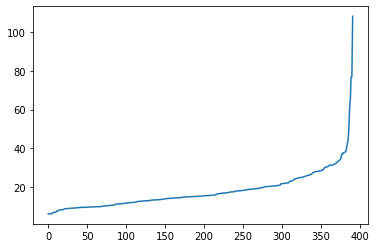

In [36]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)

(array([63., 37., 20., 24., 17., 36., 24., 22., 21.,  9., 17., 20., 10.,
        22., 14., 12.,  9.,  8.,  5.,  2.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ,
        51.6, 56.2, 60.8, 65.4, 70. , 74.6, 79.2, 83.8, 88.4, 93. ]),
 <a list of 20 Patch objects>)

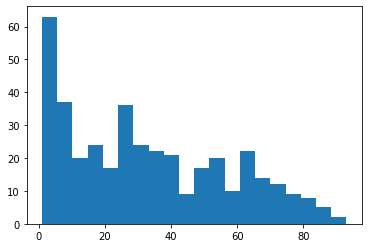

In [47]:
from sklearn.neighbors import KDTree
neighbercount=KDTree(x)
NC=neighbercount.query_radius(x,r=35,count_only=True)
plt.hist(NC,bins=20)

In [19]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=50, min_samples = 150)
clusters = dbscan.fit_predict(x)
np.unique(clusters)

array([-1,  0], dtype=int64)

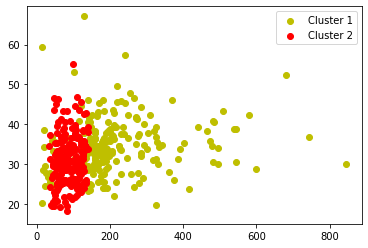

In [24]:
colors = 'rgbkcmy'

for i in np.unique(clusters):
    plt.scatter(x[clusters==i,4], x[clusters==i,5],
                color=colors[i], label='Cluster '+str(i+2))

plt.legend()
plt.show()

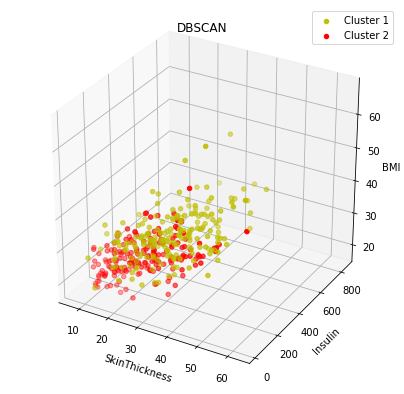

In [27]:
from mpl_toolkits.mplot3d import Axes3D
colors = 'rgbkcmy'

fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

for i in np.unique(clusters):
    ax.scatter3D(x[clusters==i,3],
             x[clusters==i,4],
             x[clusters==i,5],
                 color=colors[i], label='Cluster '+str(i+2))

ax.set_xlabel(dataset.columns[3])
ax.set_ylabel(dataset.columns[4])
ax.set_zlabel(dataset.columns[5])

plt.legend()
plt.title('DBSCAN')
plt.show()